#**TVS Credit - Mega Hackathon**

##**Domain:** Bank_Loans

#**Goal:** 
The goal of the problem is to predict whether a client will default on the vehicle loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish the future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level
Note: Please answer the below descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation. This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out.



### **Project Objective:**

Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.

## **1.1) Import Data set**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test_set= pd.read_csv('/content/drive/My Drive/Python/ht_tvs/Test_Set_TVS.csv')
pd.set_option('display.max_columns',None)
test_set.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,Metro,1,Grad,Married,M,1_to_3,5.4,Not_Specified,thur,Yes,CLoan,3.0,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.3,Y,wed,No,CLoan,2.0,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,Rural,1,Grad,Married,M,1_to_3,11.0,Y,thur,No,CLoan,3.0,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,9.7,Y,Tue,Yes,CLoan,2.0,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,Metro,3,P_Grad,Married,F,1_to_3,NaN,Y,wed,Yes,RLoan,2.0,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [5]:
test_set.shape

(56760, 32)

In [6]:
train_set= pd.read_csv('/content/drive/My Drive/Python/ht_tvs/Train_Set_TVS.csv')

pd.set_option('display.max_columns',None)
train_set.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [7]:
train_set.shape

(132440, 33)

In [8]:
train_set.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000,132440.000000
mean,488938.279319,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738,0.264301
std,58568.207772,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246,0.440962
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.500000,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000,0.000000
50%,488952.500000,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000,0.000000
75%,539702.000000,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

#**1.2) Data Cleaning**

In [17]:
train_set.isnull().any()

ID                    False
Compensation           True
Vehicle_Status         True
Loan_amt              False
Annuity_amt            True
density_Ind            True
Job_Type               True
Default_hist          False
Prop_List              True
Home_Appliances        True
Region_Type           False
Credit_Inq             True
Education_det         False
Marital_Stat          False
Gen                   False
Credit_Lnks           False
Experience             True
Income_Alt             True
Day_Process           False
Ph.No                 False
Type_Loan             False
Dependents            False
Company_Rating         True
Region                False
Age                   False
hour_Process          False
Addr_permanent        False
Permanent_Addr_tag    False
c1_rated               True
c2_rated               True
Contact_age            True
Product_bought        False
Default               False
dtype: bool

In [89]:
train_set.describe(include='object')

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
count,123336,122192,132440,130475,132440,129750,132440,132440,132440,132440,124758,132440,132440,132440,132440,132440,132440
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,4,2,2
top,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,North,Yes,Yes
freq,81370,66982,119170,91559,107548,67072,93858,97609,87063,117604,89848,23146,105944,119928,53101,122098,108616


In [90]:
mydata=train_set
mydata.shape

(132440, 33)

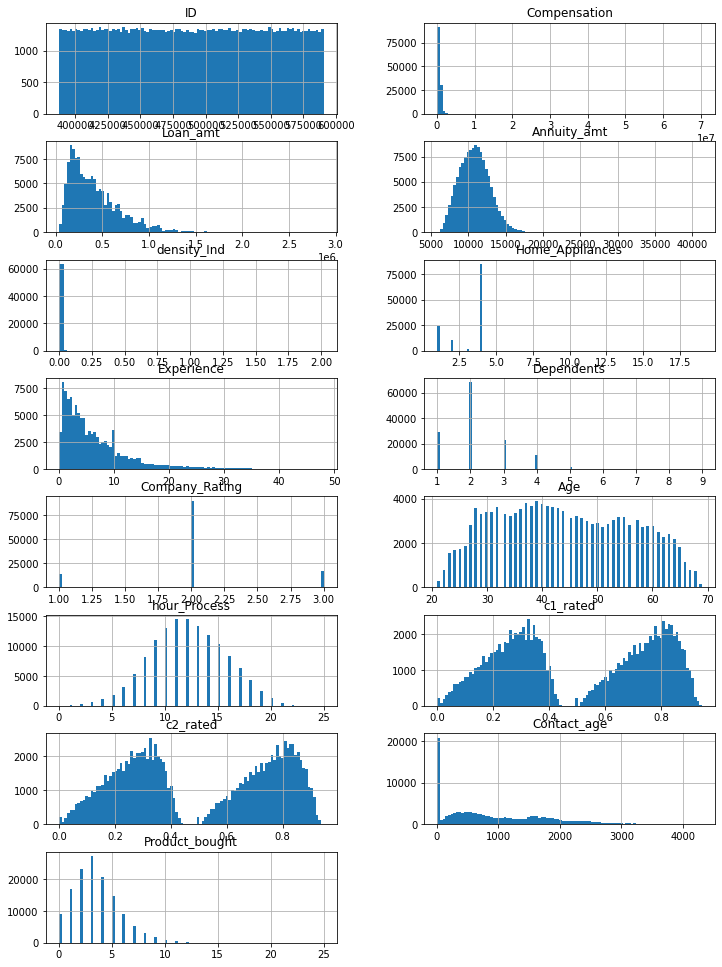

In [91]:
columns = list(mydata)[0:-1] # Excluding Outcome column which has only 
mydata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

In [97]:
mydata.corr() # It will show correlation matrix 

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,1.000000,0.000663,0.001005,0.001591,0.001294,0.002065,-0.006953,0.000616,0.001091,-0.000608,0.000909,0.003904,0.003714,-0.003894,0.001894,0.000072
Compensation,0.000663,1.000000,0.266282,0.240677,0.000676,-0.027005,0.026336,0.028301,-0.163948,-0.042217,0.064352,-0.015832,-0.014824,0.033560,0.018357,-0.001455
Loan_amt,0.001005,0.266282,1.000000,0.487726,0.000780,0.002664,0.076666,0.054520,-0.101911,0.049473,0.042255,0.006083,0.005706,0.063308,-0.029405,-0.008946
Annuity_amt,0.001591,0.240677,0.487726,1.000000,0.002008,-0.012353,0.035001,0.051107,-0.096917,-0.006268,0.030093,0.003830,0.001989,0.040426,-0.008943,-0.004134
density_Ind,0.001294,0.000676,0.000780,0.002008,1.000000,0.001068,-0.002896,-0.000848,-0.009716,-0.001770,0.003082,-0.001601,-0.003426,-0.003137,0.000278,0.000991
Home_Appliances,0.002065,-0.027005,0.002664,-0.012353,0.001068,1.000000,0.072510,-0.618543,-0.010596,0.330201,0.001249,0.007362,0.008609,-0.007108,0.030492,-0.003848
Experience,-0.006953,0.026336,0.076666,0.035001,-0.002896,0.072510,1.000000,-0.035172,0.006026,0.329404,-0.012679,0.040402,0.041519,0.132993,-0.001461,-0.022894
Dependents,0.000616,0.028301,0.054520,0.051107,-0.000848,-0.618543,-0.035172,1.000000,0.030451,-0.264799,-0.011311,-0.004097,-0.003398,0.027048,-0.017262,0.002355
Company_Rating,0.001091,-0.163948,-0.101911,-0.096917,-0.009716,-0.010596,0.006026,0.030451,1.000000,-0.006189,-0.232106,0.000479,0.001683,-0.024565,0.006244,0.015499
Age,-0.000608,-0.042217,0.049473,-0.006268,-0.001770,0.330201,0.329404,-0.264799,-0.006189,1.000000,-0.076291,0.061336,0.061904,0.077793,0.052711,-0.023211


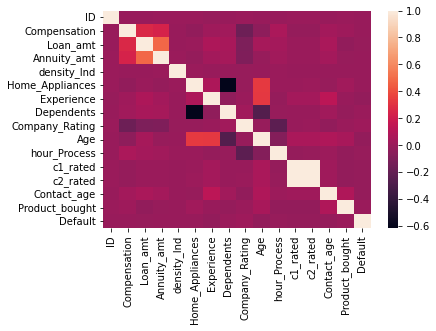

In [100]:
sns.heatmap(mydata.corr())

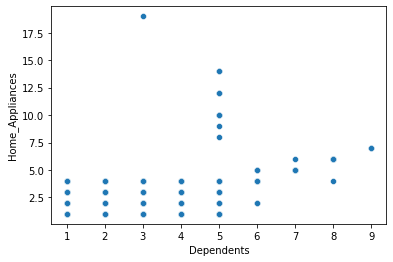

In [101]:
sns.scatterplot( x=mydata['Dependents'],y=mydata['Home_Appliances'])

In [102]:
mydata.describe(include='object')

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
count,123336,122192,132440,130475,132440,129750,132440,132440,132440,132440,124758,132440,132440,132440,132440,132440,132440
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,4,2,2
top,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,North,Yes,Yes
freq,81370,66982,119170,91559,107548,67072,93858,97609,87063,117604,89848,23146,105944,119928,53101,122098,108616


In [103]:
print('Job_Type:','\n',mydata['Job_Type'].value_counts(),'\n')
print('Credit_Inq:','\n',mydata['Credit_Inq'].value_counts(),'\n')
print('Gen:','\n',mydata['Gen'].value_counts(),'\n')
print('Credit_Lnks:','\n',mydata['Credit_Lnks'].value_counts(),'\n')
print('Day_Process:','\n',mydata['Day_Process'].value_counts(),'\n')
print('Region:','\n',mydata['Region'].value_counts(),'\n')



Job_Type: 
 IT        66982
Non-IT    29488
Govt.     25722
Name: Job_Type, dtype: int64 

Credit_Inq: 
 1     67072
2     30362
3     23178
>4     9138
Name: Credit_Inq, dtype: int64 

Gen: 
 M    87063
F    45377
Name: Gen, dtype: int64 

Credit_Lnks: 
 1_to_3    117604
4_to_6     13182
>6          1654
Name: Credit_Lnks, dtype: int64 

Day_Process: 
 Tue     23146
wed     22387
thur    21958
mon     21936
Fri     21701
SAT     14489
Sun      6823
Name: Day_Process, dtype: int64 

Region: 
 North      53101
East       28615
Central    27227
South      23497
Name: Region, dtype: int64 



In [104]:
mydata=mydata.apply(lambda x: x.replace({
                                 
                                                  ">4":1, # Credit_Inq
                                         
                                                 }, regex=True))

In [105]:
mydata['Credit_Inq'].value_counts()

1    67072
2    30362
3    23178
1     9138
Name: Credit_Inq, dtype: int64

In [106]:
# more counts available considered as max count varriabel
mydata=mydata.apply(lambda x: x.replace({'N':2,'Y':1, #vehicel status
                                          'IT':3,'Govt.':2, #Job_Type
                                         'ndf':2,'df':1,# Default_hist                                         
                                                'One':3,'None':2, 'Morethan_One':1, #Prop_List
                                                'Metro':3, 'Rural':2, 'other':1, # Region_Type
                                                 
                                                'Grad':3, 'P_Grad':2, 'Other':1, # Education_det
                                                'Married':4, 'Single':3, 'Divorce':2, 'Widow':1, #Marital_Stat
                                                 'M':2, "F":1, #Gen
                                                 '1_to_3':3, '4_to_6':2, '>6':1, #Credit_Lnks
                                                 'Not_Specified':2, "Y":1, # Income_Alt
                                                 'Tue':7, 'wed':6,'thur':5,'mon':4, 'Fri':3, 'SAT':2,'Sun':1,  #Day_Process
                                                 'Yes':2,'No':1, #Ph.No                                               
                                                'CLoan':2,  'RLoan':1, #Type_Loan
                                                 'North':4, 'East':3, 'Central':2, 'South':1, #Region
                                                 'Yes':2,'No':1, #Addr_permanent
                                                 'Yes':2,'No':1, #Permanent_Addr_tag
                                                'NAN':0, 'NaN':0, 'np.nan':0, 'np.NaN':0, ' ':0, 'np.NAN':0,'':0
                                                
                                                  
                                                 }, regex=True))



In [107]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  float64
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  float64
 7   Default_hist        132440 non-null  int64  
 8   Prop_List           130475 non-null  float64
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  int64  
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  int64  
 13  Marital_Stat        132440 non-null  int64  
 14  Gen                 132440 non-null  int64  
 15  Credit_Lnks         132440 non-nul

In [112]:
mydata['Credit_Inq']=mydata['Credit_Inq'].astype('float64')

In [113]:
mydata['Credit_Inq'].dtype

dtype('float64')

In [114]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  float64
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  float64
 7   Default_hist        132440 non-null  int64  
 8   Prop_List           130475 non-null  float64
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  int64  
 11  Credit_Inq          129750 non-null  float64
 12  Education_det       132440 non-null  int64  
 13  Marital_Stat        132440 non-null  int64  
 14  Gen                 132440 non-null  int64  
 15  Credit_Lnks         132440 non-nul

In [115]:
mydata['Credit_Inq'].value_counts()

1.0    76210
2.0    30362
3.0    23178
Name: Credit_Inq, dtype: int64

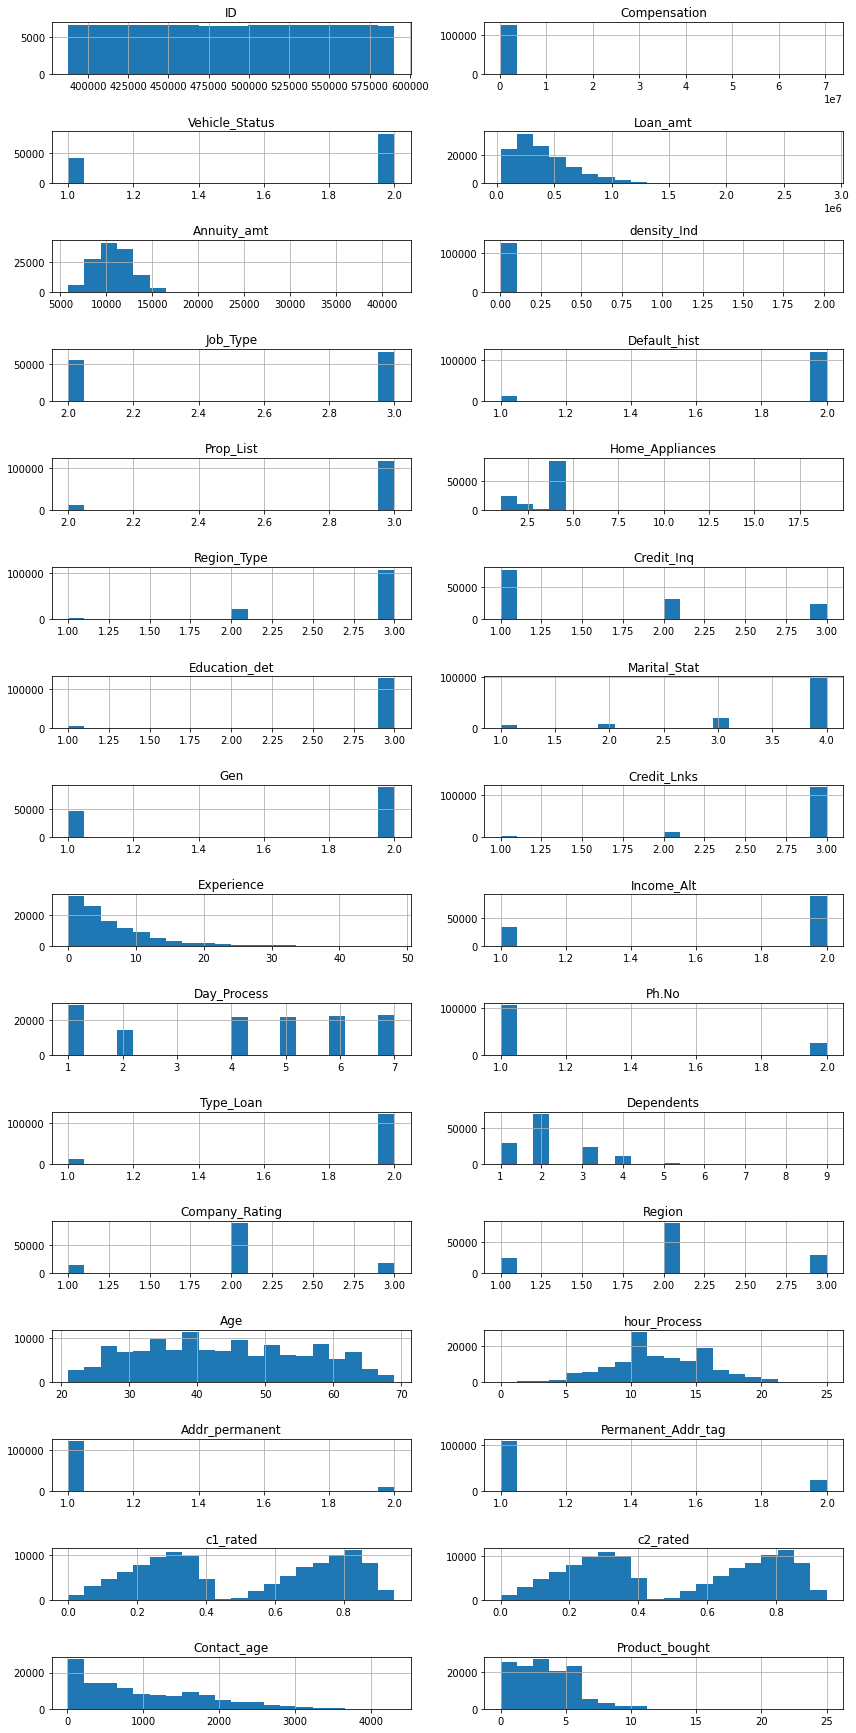

In [116]:
columns = list(mydata)[0:-1] # Excluding Outcome column which has only 
mydata[columns].hist(stacked=False, bins=20, figsize=(12,30), layout=(20,2)); 
plt.tight_layout()
# Histogram of first 8 columns

In [117]:
mydata.corr()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,1.000000,0.000663,-0.004994,0.001005,0.001591,0.001294,0.003492,-0.002254,-0.002149,0.002065,0.002104,0.006066,0.002033,0.000105,-0.002962,-0.004337,-0.006953,0.002686,0.001400,-0.003567,-0.002266,0.000616,0.001091,0.000173,-0.000608,0.000909,0.001937,-0.000525,0.003904,0.003714,-0.003894,0.001894,0.000072
Compensation,0.000663,1.000000,-0.147436,0.266282,0.240677,0.000676,-0.067508,-0.017206,-0.017138,-0.027005,0.028060,-0.032177,-0.002480,0.031574,-0.137313,0.005765,0.026336,-0.004910,0.002560,-0.036402,0.002677,0.028301,-0.163948,0.024541,-0.042217,0.064352,0.007882,0.011061,-0.015832,-0.014824,0.033560,0.018357,-0.001455
Vehicle_Status,-0.004994,-0.147436,1.000000,-0.103778,-0.091981,0.000517,0.060765,0.069344,0.069424,0.091585,0.002196,0.117292,0.000095,-0.145845,0.332885,-0.008286,0.024233,-0.007274,-0.000629,-0.008968,0.004680,-0.142393,0.019296,-0.024102,0.126595,-0.010864,-0.006527,-0.087835,-0.001228,-0.002375,-0.034771,0.027470,0.005975
Loan_amt,0.001005,0.266282,-0.103778,1.000000,0.487726,0.000780,-0.049314,-0.001790,-0.002139,0.002664,-0.023164,-0.011904,0.023082,0.098948,-0.020477,0.032723,0.076666,-0.026075,0.008184,-0.020504,0.198827,0.054520,-0.101911,0.007695,0.049473,0.042255,-0.025121,-0.005098,0.006083,0.005706,0.063308,-0.029405,-0.008946
Annuity_amt,0.001591,0.240677,-0.091981,0.487726,1.000000,0.002008,-0.042690,-0.014083,-0.014023,-0.012353,-0.012260,-0.022624,0.006631,0.079397,-0.050511,0.013705,0.035001,-0.010141,0.005179,-0.018224,0.157911,0.051107,-0.096917,0.001396,-0.006268,0.030093,-0.002660,0.004531,0.003830,0.001989,0.040426,-0.008943,-0.004134
density_Ind,0.001294,0.000676,0.000517,0.000780,0.002008,1.000000,-0.002466,0.001578,0.001843,0.001068,-0.003212,0.000540,0.000075,0.000119,0.000499,0.002147,-0.002896,0.001606,-0.002483,-0.001501,0.001250,-0.000848,-0.009716,-0.000499,-0.001770,0.003082,0.002961,-0.002661,-0.001601,-0.003426,-0.003137,0.000278,0.000991
Job_Type,0.003492,-0.067508,0.060765,-0.049314,-0.042690,-0.002466,1.000000,-0.007896,-0.007814,-0.017814,-0.006911,-0.011077,-0.007486,-0.001793,0.036102,-0.015505,-0.024842,0.012329,-0.008136,0.007859,0.000612,0.007129,0.023822,-0.015712,-0.060513,-0.004492,0.010950,0.005192,-0.001090,-0.000297,-0.020596,-0.001366,0.001604
Default_hist,-0.002254,-0.017206,0.069344,-0.001790,-0.014083,0.001578,-0.007896,1.000000,0.997491,0.288792,0.014196,0.130704,0.002311,-0.108568,0.032131,0.000808,0.036051,-0.013618,0.008667,-0.043071,0.007423,-0.662911,-0.025942,-0.002538,0.192526,0.005934,-0.003915,-0.049360,0.007520,0.005707,-0.006689,0.014560,-0.000555
Prop_List,-0.002149,-0.017138,0.069424,-0.002139,-0.014023,0.001843,-0.007814,0.997491,1.000000,0.293764,0.014545,0.130077,0.002322,-0.108328,0.032078,0.000666,0.036122,-0.012793,0.008969,-0.043595,0.007431,-0.656717,-0.025280,-0.002555,0.192427,0.005700,-0.004233,-0.049211,0.007066,0.005127,-0.006854,0.014573,-0.000352
Home_Appliances,0.002065,-0.027005,0.091585,0.002664,-0.012353,0.001068,-0.017814,0.288792,0.293764,1.000000,0.021260,0.216701,0.003395,-0.134106,0.043244,0.033624,0.072510,-0.034736,0.005297,-0.038544,0.035246,-0.618543,-0.010596,-0.013972,0.330201,0.001249,-0.027773,-0.058132,0.007362,0.008609,-0.007108,0.030492,-0.003848


In [118]:
mydata['Job_Type'].value_counts()

3.0    66982
2.0    55210
Name: Job_Type, dtype: int64

In [119]:
mydata['Prop_List'].value_counts()

3.0    117455
2.0     13020
Name: Prop_List, dtype: int64

In [120]:
print('Job_Type:','\n',mydata['Job_Type'].value_counts(),'\n')
print('Credit_Inq:','\n',mydata['Credit_Inq'].value_counts(),'\n')
print('Gen:','\n',mydata['Gen'].value_counts(),'\n')
print('Credit_Lnks:','\n',mydata['Credit_Lnks'].value_counts(),'\n')
print('Day_Process:','\n',mydata['Day_Process'].value_counts(),'\n')
print('Region:','\n',mydata['Region'].value_counts(),'\n')

Job_Type: 
 3.0    66982
2.0    55210
Name: Job_Type, dtype: int64 

Credit_Inq: 
 1.0    76210
2.0    30362
3.0    23178
Name: Credit_Inq, dtype: int64 

Gen: 
 2    87063
1    45377
Name: Gen, dtype: int64 

Credit_Lnks: 
 3    117604
2     13182
1      1654
Name: Credit_Lnks, dtype: int64 

Day_Process: 
 1    28524
7    23146
6    22387
5    21958
4    21936
2    14489
Name: Day_Process, dtype: int64 

Region: 
 2    80328
3    28615
1    23497
Name: Region, dtype: int64 



In [121]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr1(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

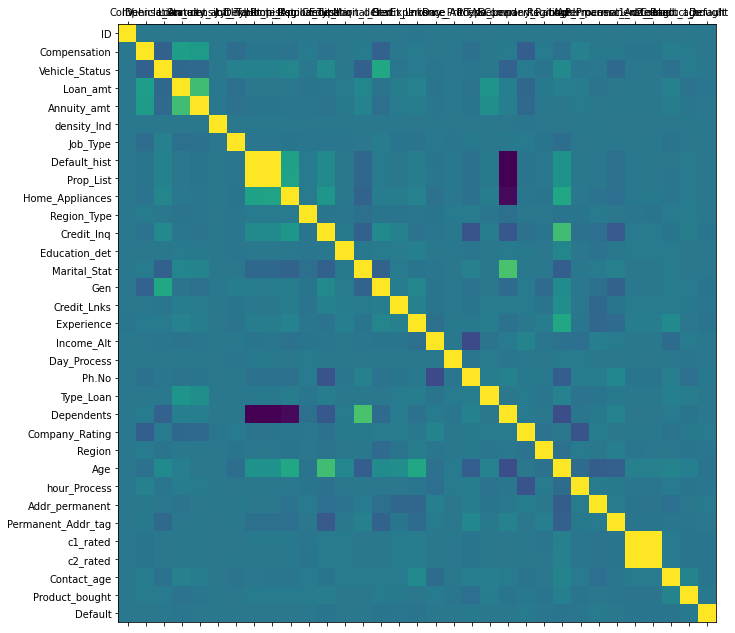

In [122]:
plot_corr1(mydata)

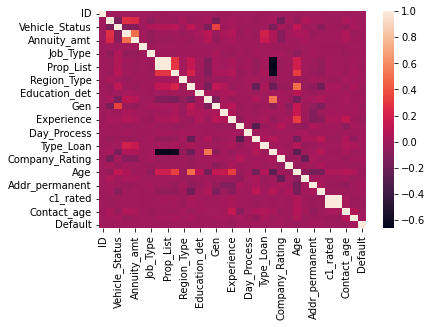

In [123]:
sns.heatmap(mydata.corr())

In [126]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  float64
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  float64
 7   Default_hist        132440 non-null  int64  
 8   Prop_List           130475 non-null  float64
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  int64  
 11  Credit_Inq          129750 non-null  float64
 12  Education_det       132440 non-null  int64  
 13  Marital_Stat        132440 non-null  int64  
 14  Gen                 132440 non-null  int64  
 15  Credit_Lnks         132440 non-nul

In [141]:
mydata.fillna(0, inplace=True)

In [142]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        132440 non-null  float64
 2   Vehicle_Status      132440 non-null  float64
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         132440 non-null  float64
 5   density_Ind         132440 non-null  float64
 6   Job_Type            132440 non-null  float64
 7   Default_hist        132440 non-null  int64  
 8   Prop_List           132440 non-null  float64
 9   Home_Appliances     132440 non-null  float64
 10  Region_Type         132440 non-null  int64  
 11  Credit_Inq          132440 non-null  float64
 12  Education_det       132440 non-null  int64  
 13  Marital_Stat        132440 non-null  int64  
 14  Gen                 132440 non-null  int64  
 15  Credit_Lnks         132440 non-nul

Calculate Default ratio of True/False from outcome variable

In [143]:
n_true = len(mydata.loc[mydata['Default'] == True])
n_false = len(mydata.loc[mydata['Default'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))


Number of true cases: 35004 (26.43%)
Number of false cases: 97436 (73.57%)


So we have 26.43% people in current data set who have default and rest of 73.57% doesn't have default.

Its a good distribution True/False cases of defaulters in data.

Spliting the data

In [144]:
from sklearn.model_selection import train_test_split

X = mydata.drop('Default',axis=1)     # Predictor feature columns (8 X m)
Y = mydata['Default']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
6054,590169,1058862.0,0.0,434374.00,14857.74,0.0316,2.0,2,3.0,4.0,3,2.0,3,4,1,3,1.0,1.0,7,1,2,2.0,2.0,2,39.0,16.0,2,1,0.710,0.710,11.0,8.0
132193,517284,1054872.0,2.0,475397.40,9230.09,0.0386,3.0,2,3.0,4.0,3,1.0,3,4,2,3,14.4,2.0,5,1,2,2.0,1.0,3,46.0,15.0,1,2,0.638,0.638,756.0,6.0
91479,482825,523029.0,2.0,167316.00,9112.90,0.0179,2.0,2,3.0,4.0,3,1.0,3,4,2,3,4.1,2.0,7,1,2,2.0,3.0,2,51.0,7.0,1,1,0.657,0.657,1719.0,4.0
84492,398930,415106.0,1.0,304415.65,8483.95,0.0258,3.0,2,3.0,4.0,3,3.0,3,4,2,3,8.4,1.0,4,1,2,2.0,2.0,2,63.0,11.0,1,1,0.302,0.302,1599.0,5.0
21968,434124,711828.0,1.0,488040.00,9593.45,0.0206,3.0,1,0.0,2.0,3,1.0,3,4,1,3,4.6,2.0,1,1,2,4.0,3.0,2,35.0,11.0,1,1,0.361,0.361,2057.0,5.0


Lets check split of data

In [145]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(mydata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(mydata.index)) * 100))


70.00% data is in training set
30.00% data is in test set


Now lets check default True/False ratio in split data

In [146]:
print("Original Default True Values    : {0} ({1:0.2f}%)".format(len(mydata.loc[mydata['Default'] == 1]), (len(mydata.loc[mydata['Default'] == 1])/len(mydata.index)) * 100))
print("Original Default False Values   : {0} ({1:0.2f}%)".format(len(mydata.loc[mydata['Default'] == 0]), (len(mydata.loc[mydata['Default'] == 0])/len(mydata.index)) * 100))
print("")
print("Training Default True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Default False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Default True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Default False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Default True Values    : 35004 (26.43%)
Original Default False Values   : 97436 (73.57%)

Training Default True Values    : 24527 (26.46%)
Training Default False Values   : 68181 (73.54%)

Test Default True Values        : 10477 (26.37%)
Test Default False Values       : 29255 (73.63%)



##Data Preparation

In [147]:
x_train

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
6054,590169,1058862.0,0.0,434374.00,14857.74,0.0316,2.0,2,3.0,4.0,3,2.0,3,4,1,3,1.0,1.0,7,1,2,2.0,2.0,2,39.0,16.0,2,1,0.710,0.710,11.0,8.0
132193,517284,1054872.0,2.0,475397.40,9230.09,0.0386,3.0,2,3.0,4.0,3,1.0,3,4,2,3,14.4,2.0,5,1,2,2.0,1.0,3,46.0,15.0,1,2,0.638,0.638,756.0,6.0
91479,482825,523029.0,2.0,167316.00,9112.90,0.0179,2.0,2,3.0,4.0,3,1.0,3,4,2,3,4.1,2.0,7,1,2,2.0,3.0,2,51.0,7.0,1,1,0.657,0.657,1719.0,4.0
84492,398930,415106.0,1.0,304415.65,8483.95,0.0258,3.0,2,3.0,4.0,3,3.0,3,4,2,3,8.4,1.0,4,1,2,2.0,2.0,2,63.0,11.0,1,1,0.302,0.302,1599.0,5.0
21968,434124,711828.0,1.0,488040.00,9593.45,0.0206,3.0,1,0.0,2.0,3,1.0,3,4,1,3,4.6,2.0,1,1,2,4.0,3.0,2,35.0,11.0,1,1,0.361,0.361,2057.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,492927,646418.0,2.0,175974.00,9983.04,0.0127,3.0,2,3.0,4.0,3,1.0,3,3,2,3,3.5,2.0,6,1,1,1.0,0.0,1,22.0,16.0,1,1,0.531,0.531,664.0,0.0
109259,570893,725724.0,1.0,1066912.00,13677.50,0.0172,3.0,2,3.0,4.0,3,3.0,3,4,1,3,0.0,2.0,1,1,2,2.0,0.0,2,60.0,11.0,2,1,0.386,0.386,19.0,3.0
50057,545357,784754.0,1.0,196497.00,9698.52,0.0077,2.0,2,3.0,4.0,3,2.0,3,4,1,3,8.2,2.0,1,1,2,2.0,2.0,2,56.0,10.0,1,1,0.000,0.679,336.0,3.0
5192,578271,390024.0,2.0,165542.00,12409.46,0.0080,2.0,2,3.0,4.0,3,1.0,3,4,2,3,9.4,2.0,5,1,2,2.0,3.0,2,49.0,3.0,1,1,0.000,0.361,853.0,4.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,590169,1058862,1,434374,14857,0,2,2,3,4,3,2,3,4,1,3,1,1,7,1,2,2,2,2,39,16,2,1,0,0,11,8
1,517284,1054872,2,475397,9230,0,3,2,3,4,3,1,3,4,2,3,14,2,5,1,2,2,1,3,46,15,1,2,0,0,756,6
2,482825,523029,2,167316,9112,0,2,2,3,4,3,1,3,4,2,3,4,2,7,1,2,2,3,2,51,7,1,1,0,0,1719,4
3,398930,415106,1,304415,8483,0,3,2,3,4,3,3,3,4,2,3,8,1,4,1,2,2,2,2,63,11,1,1,0,0,1599,5
4,434124,711828,1,488040,9593,0,3,1,2,2,3,1,3,4,1,3,4,2,1,1,2,4,3,2,35,11,1,1,0,0,2057,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92703,492927,646418,2,175974,9983,0,3,2,3,4,3,1,3,3,2,3,3,2,6,1,1,1,2,1,22,16,1,1,0,0,664,3
92704,570893,725724,1,1066912,13677,0,3,2,3,4,3,3,3,4,1,3,6,2,1,1,2,2,2,2,60,11,2,1,0,0,19,3
92705,545357,784754,1,196497,9698,0,2,2,3,4,3,2,3,4,1,3,8,2,1,1,2,2,2,2,56,10,1,1,0,0,336,3
92706,578271,390024,2,165542,12409,0,2,2,3,4,3,1,3,4,2,3,9,2,5,1,2,2,3,2,49,3,1,1,0,0,853,4


In [148]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,590169.0,1058862.0,1.659592,434374.00,14857.74,0.0316,2.0,2.0,3.000000,4.0,3.0,2.0,3.0,4.0,1.0,3.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,39.0,16.0,2.0,1.0,0.710,0.710,11.0,8.0
1,517284.0,1054872.0,2.000000,475397.40,9230.09,0.0386,3.0,2.0,3.000000,4.0,3.0,1.0,3.0,4.0,2.0,3.0,14.4,2.0,5.0,1.0,2.0,2.0,1.0,3.0,46.0,15.0,1.0,2.0,0.638,0.638,756.0,6.0
2,482825.0,523029.0,2.000000,167316.00,9112.90,0.0179,2.0,2.0,3.000000,4.0,3.0,1.0,3.0,4.0,2.0,3.0,4.1,2.0,7.0,1.0,2.0,2.0,3.0,2.0,51.0,7.0,1.0,1.0,0.657,0.657,1719.0,4.0
3,398930.0,415106.0,1.000000,304415.65,8483.95,0.0258,3.0,2.0,3.000000,4.0,3.0,3.0,3.0,4.0,2.0,3.0,8.4,1.0,4.0,1.0,2.0,2.0,2.0,2.0,63.0,11.0,1.0,1.0,0.302,0.302,1599.0,5.0
4,434124.0,711828.0,1.000000,488040.00,9593.45,0.0206,3.0,1.0,2.900501,2.0,3.0,1.0,3.0,4.0,1.0,3.0,4.6,2.0,1.0,1.0,2.0,4.0,3.0,2.0,35.0,11.0,1.0,1.0,0.361,0.361,2057.0,5.0


In [149]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0             1             2             3         4             5  \
0 -0.000001  9.694294e-09 -5.201978e-08 -7.282407e-09 -0.000028 -8.243523e-10   

              6             7             8             9            10  \
0 -9.024826e-08 -6.875345e-08 -1.021147e-07 -1.350514e-07 -7.632871e-08   

             11            12            13            14            15  \
0 -1.291177e-07 -9.737874e-08 -9.690054e-08 -1.094602e-07 -1.128572e-07   

         16            17            18            19            20  \
0 -0.000001 -4.401173e-08 -1.318883e-07 -2.702569e-08 -3.787777e-08   

             21            22            23        24            25  \
0 -4.966767e-08 -2.660779e-08 -1.077838e-07 -0.000004 -5.941075e-07   

             26            27            28            29        30  \
0 -5.451779e-09 -3.421769e-08 -4.234220e-08 -4.556711e-08 -0.000057   

             31     intercept  
0 -4.051237e-09 -3.327871e-08  


In [150]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7363082653780328


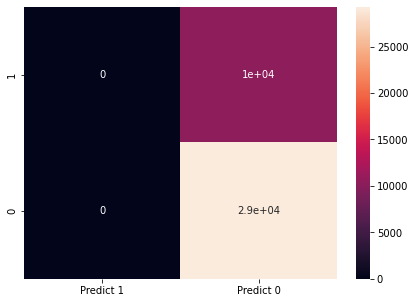

In [151]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have default 0

True Negatives (TN): we correctly predicted that they don't have default(2.9e+4 = 2.9 x 10^4 = 29,000)---- 29000

False Positives (FP): we incorrectly predicted that they do have defaul (a "Type I error") 0 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have defaul (a "Type II error") 1e+04 = 1 x 10^4 = 10,000 Falsely predict negative Type II error

In [152]:
x_train.shape

(92708, 32)

In [153]:
y_predict.shape

(39732,)

In [156]:
coef_df.head

<bound method NDFrame.head of           0             1             2             3         4             5  \
0 -0.000001  9.694294e-09 -5.201978e-08 -7.282407e-09 -0.000028 -8.243523e-10   

              6             7             8             9            10  \
0 -9.024826e-08 -6.875345e-08 -1.021147e-07 -1.350514e-07 -7.632871e-08   

             11            12            13            14            15  \
0 -1.291177e-07 -9.737874e-08 -9.690054e-08 -1.094602e-07 -1.128572e-07   

         16            17            18            19            20  \
0 -0.000001 -4.401173e-08 -1.318883e-07 -2.702569e-08 -3.787777e-08   

             21            22            23        24            25  \
0 -4.966767e-08 -2.660779e-08 -1.077838e-07 -0.000004 -5.941075e-07   

             26            27            28            29        30  \
0 -5.451779e-09 -3.421769e-08 -4.234220e-08 -4.556711e-08 -0.000057   

             31     intercept  
0 -4.051237e-09 -3.327871e-08  >

In [158]:
df=train_set[train_set['Default'] == 1]
df.shape

(35004, 33)

In [159]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
6,525234,757887.0,N,977270.0,10708.27,0.0089,IT,df,None,2.0,Metro,1,Grad,Married,F,1_to_3,4.1,Not_Specified,Tue,No,CLoan,4.0,2.0,South,36.0,12.0,Yes,Yes,0.142,0.142,721.0,3.0,1.0
9,497049,822222.0,N,265048.0,8849.20,0.0138,Non-IT,ndf,One,4.0,Metro,1,Grad,Single,M,4_to_6,1.3,Not_Specified,thur,Yes,CLoan,1.0,2.0,East,34.0,12.0,Yes,Yes,0.757,NaN,888.0,6.0,1.0
10,495109,733560.0,N,225547.0,9563.82,0.0345,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.4,Not_Specified,mon,Yes,CLoan,3.0,2.0,North,24.0,10.0,Yes,Yes,0.569,0.569,15.0,3.0,1.0
14,501807,346944.0,Y,187999.0,9332.92,0.0017,IT,df,None,2.0,Rural,1,Grad,Married,M,1_to_3,2.5,Not_Specified,wed,Yes,CLoan,4.0,2.0,East,34.0,13.0,Yes,Yes,NaN,0.755,18.0,4.0,1.0


In [160]:
# describe the data
df.describe(include='all')

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,35004.000000,3.338900e+04,32581,3.500400e+04,33773.000000,33546.000000,32333,35004,34462,32138.000000,35004,34341,35004,35004,35004,35004,29527.000000,32983,35004,35004,35004,35004.000000,31837.000000,35004,35004.000000,35004.000000,35004,35004,30409.000000,31434.000000,32843.000000,35004.000000,35004.0
unique,NaN,NaN,2,NaN,NaN,NaN,3,2,3,NaN,3,4,3,4,2,3,NaN,2,7,2,2,NaN,NaN,4,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,IT,ndf,One,NaN,Metro,1,Grad,Married,M,1_to_3,NaN,Not_Specified,Tue,Yes,CLoan,NaN,NaN,North,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21649,NaN,NaN,NaN,17767,31487,24105,NaN,28478,18101,25203,25811,22590,30907,NaN,23869,6095,27776,31793,NaN,NaN,13876,NaN,NaN,32001,28605,NaN,NaN,NaN,NaN,NaN
mean,488945.286310,7.439115e+05,NaN,4.107013e+05,10831.063325,0.020471,NaN,NaN,NaN,3.212926,NaN,NaN,NaN,NaN,NaN,NaN,6.339459,NaN,NaN,NaN,NaN,2.159039,2.043597,NaN,43.470003,12.015798,NaN,NaN,0.499373,0.499786,959.473556,3.410896,1.0
std,58561.752625,5.504846e+05,NaN,2.685998e+05,2042.823265,0.015880,NaN,NaN,NaN,1.246658,NaN,NaN,NaN,NaN,NaN,NaN,6.190152,NaN,NaN,NaN,NaN,0.911751,0.503708,NaN,11.961570,3.563602,NaN,NaN,0.269254,0.269507,824.357134,2.182402,0.0
min,387662.000000,1.657950e+05,NaN,3.430000e+04,5993.280000,0.000100,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,21.000000,0.000000,NaN,NaN,0.000000,0.000000,10.000000,0.000000,1.0
25%,437966.500000,5.174800e+05,NaN,2.062618e+05,9328.330000,0.010400,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,33.000000,10.000000,NaN,NaN,0.260000,0.261000,274.000000,2.000000,1.0
50%,489394.500000,6.665880e+05,NaN,3.473168e+05,10762.320000,0.020400,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,43.000000,12.000000,NaN,NaN,0.500000,0.500000,746.000000,3.000000,1.0
75%,539509.250000,8.783190e+05,NaN,5.524995e+05,12154.130000,0.030300,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.700000,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,53.000000,15.000000,NaN,NaN,0.760000,0.762000,1566.000000,5.000000,1.0


As above data decribe

1)Vehicle Status _ No ---elated are the more defaulters 21649 nos out of 32581

2) Default historry  status as "ndf"( No Defaulters ) also have high 31487  Nos out of 35004

3) Credit links 1_to_3

4) Type of Loan---Car Loan--31793

5) Region type --Metro

In [161]:
df.isnull().sum()

ID                       0
Compensation          1615
Vehicle_Status        2423
Loan_amt                 0
Annuity_amt           1231
density_Ind           1458
Job_Type              2671
Default_hist             0
Prop_List              542
Home_Appliances       2866
Region_Type              0
Credit_Inq             663
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            5477
Income_Alt            2021
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        3167
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              4595
c2_rated              3570
Contact_age           2161
Product_bought           0
Default                  0
dtype: int64

In [162]:
df.dtypes.value_counts()

object     17
float64    15
int64       1
dtype: int64

In [163]:
mydata=df.dropna()
mydata.shape

(12407, 33)

##**2) Exploratory Data Analyis**

In [165]:
mydata.describe(include='object')

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
count,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,4,2,2
top,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,North,Yes,Yes
freq,7908,6790,10955,8097,10155,7617,8764,9290,7607,10794,8978,2144,9351,11206,3637,11197,9757


In [166]:
object_data_analyse=pd.DataFrame(mydata.describe(include='object'))
object_data_analyse

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
count,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,4,2,2
top,N,IT,ndf,One,Metro,1,Grad,Married,M,1_to_3,Not_Specified,Tue,Yes,CLoan,North,Yes,Yes
freq,7908,6790,10955,8097,10155,7617,8764,9290,7607,10794,8978,2144,9351,11206,3637,11197,9757


In [167]:
oda=object_data_analyse.drop(index='top')
oda

,Vehicle_Status,Job_Type,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Income_Alt,Day_Process,Ph.No,Type_Loan,Region,Addr_permanent,Permanent_Addr_tag
count,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407,12407
unique,2,3,2,3,3,4,3,4,2,3,2,7,2,2,4,2,2
freq,7908,6790,10955,8097,10155,7617,8764,9290,7607,10794,8978,2144,9351,11206,3637,11197,9757


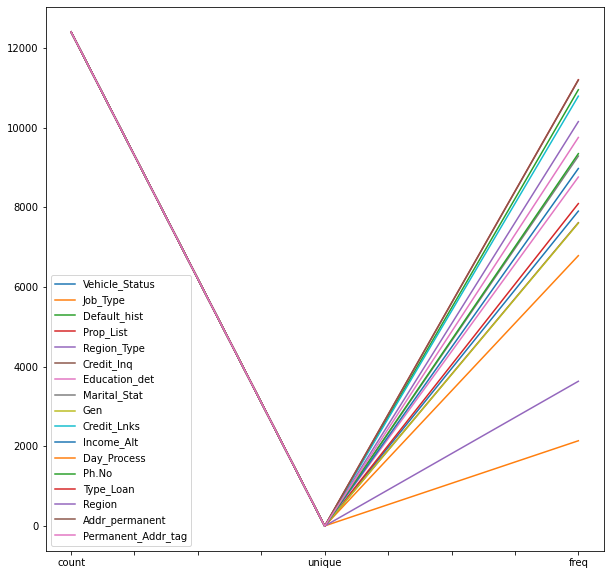

In [168]:
oda.plot(figsize=(10,10))

with above Object data analysis

1) No Vehicle holders


##**Default is more in the category  as below mentioned 9000 thousand people out of 12407 Nos are defaulters going to do the further analysis in the same**

1) Default_hist--Ndf

2) Region_Type--Metro

3) Credit_Lnks--1_to_3

4) Type_Loan--CLoan	

5) Income_Alt--Not specified


in without null Value reductin time in describe data 

below point observed 

1)Vehicle Status _ No ---elated are the more defaulters 21649 nos out of 32581

2) Default historry  status as "ndf"( No Defaulters ) also have high 31487  Nos out of 35004

3) Credit links 1_to_3

4) Type of Loan---Car Loan--31793

5) Region type --Metro

Commonly we see that 

Region_Type--Metro

Credit_Lnks--1_to_3

Type_Loan--CLoan.

above three take into consideration 
vehicle Status , and Default history, income Aleratn not specified candidates reduced

##**3) Model Building**

3.1 Submit1 --based on gender

3.2 Sbumit2--based on Govt job

3.3 Submit3-based on Alternate incom and Job

**3.4 Model Building :** Based on data now go to apply who want Car loan in Metro area who have already 1 to 3 credit links are going to be most defaulters

In [170]:
data_to_test=df.filter(['Region_Type','Credit_Lnks','Type_Loan'])
data_to_test

,Region_Type,Credit_Lnks,Type_Loan
0,Metro,1_to_3,CLoan
6,Metro,1_to_3,CLoan
9,Metro,4_to_6,CLoan
10,Metro,1_to_3,CLoan
14,Rural,1_to_3,CLoan
...,...,...,...
132426,Metro,1_to_3,CLoan
132431,Metro,1_to_3,CLoan
132435,Rural,1_to_3,CLoan
132438,Metro,1_to_3,CLoan


In [171]:
df['Credit_Lnks'].value_counts()

1_to_3    30907
4_to_6     3680
>6          417
Name: Credit_Lnks, dtype: int64

In [172]:
train_set['Credit_Lnks'].value_counts()

1_to_3    117604
4_to_6     13182
>6          1654
Name: Credit_Lnks, dtype: int64

In [173]:
df['Type_Loan'].value_counts()

CLoan    31793
RLoan     3211
Name: Type_Loan, dtype: int64

In [174]:
train_set['Type_Loan'].value_counts()

CLoan    119928
RLoan     12512
Name: Type_Loan, dtype: int64

In [175]:
train_set['Region_Type'].value_counts()

Metro    107548
Rural     22278
other      2614
Name: Region_Type, dtype: int64

In [176]:
result_29_07_01=test_set.filter(['ID','Region_Type','Credit_Lnks','Type_Loan'])
result_29_07_01

,ID,Region_Type,Credit_Lnks,Type_Loan
0,487410,Metro,1_to_3,CLoan
1,533258,Metro,1_to_3,CLoan
2,581926,Rural,1_to_3,CLoan
3,486301,Metro,1_to_3,CLoan
4,580822,Metro,1_to_3,RLoan
...,...,...,...,...
56755,513665,Metro,1_to_3,CLoan
56756,450327,Metro,1_to_3,CLoan
56757,476417,Metro,1_to_3,RLoan
56758,461152,Metro,>6,CLoan


In [177]:
pd.crosstab(train_set['Region_Type'],train_set['Type_Loan'])

Type_Loan,CLoan,RLoan
Region_Type,,
Metro,97202,10346
Rural,20367,1911
other,2359,255


In [178]:
pd.crosstab(train_set['Region_Type'],train_set['Credit_Lnks'])

Credit_Lnks,1_to_3,4_to_6,>6
Region_Type,,,
Metro,95002,11176,1370
Rural,20308,1720,250
other,2294,286,34


In [179]:
result_29_07_01=result_29_07_01.apply(lambda x: x.replace({'Metro':1, 'Rural':0, 'other':0,
                                                           'CLoan':1,  'RLoan':0,
                                                           '1_to_3':1, '4_to_6':0, '>6':0}, regex=True))
result_29_07_01

,ID,Region_Type,Credit_Lnks,Type_Loan
0,487410,1,1,1
1,533258,1,1,1
2,581926,0,1,1
3,486301,1,1,1
4,580822,1,1,0
...,...,...,...,...
56755,513665,1,1,1
56756,450327,1,1,1
56757,476417,1,1,0
56758,461152,1,0,1


In [180]:
result_29_07_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           56760 non-null  int64
 1   Region_Type  56760 non-null  int64
 2   Credit_Lnks  56760 non-null  int64
 3   Type_Loan    56760 non-null  int64
dtypes: int64(4)
memory usage: 1.7 MB


In [181]:
result_29_07_01['Default']=result_29_07_01.iloc[:,1:4].sum(axis=1)
result_29_07_01

,ID,Region_Type,Credit_Lnks,Type_Loan,Default
0,487410,1,1,1,3
1,533258,1,1,1,3
2,581926,0,1,1,2
3,486301,1,1,1,3
4,580822,1,1,0,2
...,...,...,...,...,...
56755,513665,1,1,1,3
56756,450327,1,1,1,3
56757,476417,1,1,0,2
56758,461152,1,0,1,2


In [182]:
submit04=result_29_07_01.apply(lambda x: x.replace({ 1:0,2:0,3:1 }, regex=True))
submit04

,ID,Region_Type,Credit_Lnks,Type_Loan,Default
0,487410,0,0,0,1
1,533258,0,0,0,1
2,581926,0,0,0,0
3,486301,0,0,0,1
4,580822,0,0,0,0
...,...,...,...,...,...
56755,513665,0,0,0,1
56756,450327,0,0,0,1
56757,476417,0,0,0,0
56758,461152,0,0,0,0


In [183]:
submit04=submit04.filter(['ID','Default'])
submit04

,ID,Default
0,487410,1
1,533258,1
2,581926,0
3,486301,1
4,580822,0
...,...,...
56755,513665,1
56756,450327,1
56757,476417,0
56758,461152,0


In [184]:
submit04['Default'].value_counts()

1    36813
0    19947
Name: Default, dtype: int64

In [185]:
submit04.to_csv('/content/drive/My Drive/Python/ht_tvs/submit04.csv')

###***Submit04-conclusion : in metro areas who want Car loan and who have credit links 1to3 are defauters***

**3.4) Model Building :** now trying to start analyse with including compensation<7LPA

In [186]:
result_29_07_02=test_set.filter(['ID','Compensation','Region_Type','Credit_Lnks','Type_Loan'])
result_29_07_02

,ID,Compensation,Region_Type,Credit_Lnks,Type_Loan
0,487410,653106.0,Metro,1_to_3,CLoan
1,533258,434150.0,Metro,1_to_3,CLoan
2,581926,489060.0,Rural,1_to_3,CLoan
3,486301,957294.0,Metro,1_to_3,CLoan
4,580822,1333739.0,Metro,1_to_3,RLoan
...,...,...,...,...,...
56755,513665,671640.0,Metro,1_to_3,CLoan
56756,450327,650680.0,Metro,1_to_3,CLoan
56757,476417,551374.0,Metro,1_to_3,RLoan
56758,461152,975117.0,Metro,>6,CLoan


In [187]:
result_29_07_02.fillna(result_29_07_02['Compensation'].mean(), inplace=True)

In [188]:
 result_29_07_02=result_29_07_02.apply(lambda x: x.replace({'Metro':1, 'Rural':0, 'other':0,
                                                           'CLoan':1,  'RLoan':0,
                                                           'NAN':0, 'NaN':0, 'np.nan':0, 'np.NaN':0, ' ':0,
                                                           '1_to_3':1, '4_to_6':0, '>6':0}, regex=True))
result_29_07_02

,ID,Compensation,Region_Type,Credit_Lnks,Type_Loan
0,487410,6.531060e+05,1,1,1
1,533258,4.341500e+05,1,1,1
2,581926,4.890600e+05,0,1,1
3,486301,9.572940e+05,1,1,1
4,580822,1.333739e+06,1,1,0
...,...,...,...,...,...
56755,513665,6.716400e+05,1,1,1
56756,450327,6.506800e+05,1,1,1
56757,476417,5.513740e+05,1,1,0
56758,461152,9.751170e+05,1,0,1


In [189]:
result_29_07_02.loc[ result_29_07_02["Compensation"] <= 700000, "Compensation"] = 1
result_29_07_02.loc[ result_29_07_02["Compensation"] >= 700001, "Compensation"] = 0

result_29_07_02

,ID,Compensation,Region_Type,Credit_Lnks,Type_Loan
0,487410,1.0,1,1,1
1,533258,1.0,1,1,1
2,581926,1.0,0,1,1
3,486301,0.0,1,1,1
4,580822,0.0,1,1,0
...,...,...,...,...,...
56755,513665,1.0,1,1,1
56756,450327,1.0,1,1,1
56757,476417,1.0,1,1,0
56758,461152,0.0,1,0,1


In [190]:
result_29_07_02=result_29_07_02.astype(int)

In [191]:
result_29_07_02['Default']=result_29_07_02.iloc[:,1:5
                                                ].sum(axis=1)
result_29_07_02

,ID,Compensation,Region_Type,Credit_Lnks,Type_Loan,Default
0,487410,1,1,1,1,4
1,533258,1,1,1,1,4
2,581926,1,0,1,1,3
3,486301,0,1,1,1,3
4,580822,0,1,1,0,2
...,...,...,...,...,...,...
56755,513665,1,1,1,1,4
56756,450327,1,1,1,1,4
56757,476417,1,1,1,0,3
56758,461152,0,1,0,1,2


In [192]:
submit05=result_29_07_02.apply(lambda x: x.replace({ 1:0,2:0,3:0, 4:1 }, regex=True))
submit05

,ID,Compensation,Region_Type,Credit_Lnks,Type_Loan,Default
0,487410,0,0,0,0,1
1,533258,0,0,0,0,1
2,581926,0,0,0,0,0
3,486301,0,0,0,0,0
4,580822,0,0,0,0,0
...,...,...,...,...,...,...
56755,513665,0,0,0,0,1
56756,450327,0,0,0,0,1
56757,476417,0,0,0,0,0
56758,461152,0,0,0,0,0


In [193]:
submit05=submit05.filter(['ID','Default'])
submit05

,ID,Default
0,487410,1
1,533258,1
2,581926,0
3,486301,0
4,580822,0
...,...,...
56755,513665,1
56756,450327,1
56757,476417,0
56758,461152,0


In [194]:
submit05['Default'].value_counts()

0    37869
1    18891
Name: Default, dtype: int64

In [195]:
submit05.to_csv('/content/drive/My Drive/Python/ht_tvs/submit05.csv',index=False)

Submit5 conclusion is .. same of Submit5 and added Compensation condition more than 7 Lakh

##3.6 give loan for all more than 5 lackh Salary


In [196]:
result_29_07_03=test_set.filter(['ID','Compensation'])
result_29_07_03

,ID,Compensation
0,487410,653106.0
1,533258,434150.0
2,581926,489060.0
3,486301,957294.0
4,580822,1333739.0
...,...,...
56755,513665,671640.0
56756,450327,650680.0
56757,476417,551374.0
56758,461152,975117.0


In [197]:
result_29_07_03.fillna(result_29_07_03['Compensation'].mean(), inplace=True)

In [198]:
result_29_07_03['Default']=round(result_29_07_03['Compensation']/500000)
result_29_07_03

,ID,Compensation,Default
0,487410,6.531060e+05,1.0
1,533258,4.341500e+05,1.0
2,581926,4.890600e+05,1.0
3,486301,9.572940e+05,2.0
4,580822,1.333739e+06,3.0
...,...,...,...
56755,513665,6.716400e+05,1.0
56756,450327,6.506800e+05,1.0
56757,476417,5.513740e+05,1.0
56758,461152,9.751170e+05,2.0


In [199]:
result_29_07_03['Default'].value_counts()

1.0     35748
2.0     17022
3.0      2885
4.0       522
0.0       260
5.0       166
6.0        64
7.0        36
9.0        17
8.0        13
11.0        5
10.0        4
15.0        4
13.0        4
14.0        3
16.0        2
12.0        2
18.0        1
35.0        1
27.0        1
Name: Default, dtype: int64

In [200]:
submit06=result_29_07_03.apply(lambda x: x.replace({ 1.0:1,2.0:0,3.0:0, 4.0:0,5.0:0,6.0:0,7.0:0,8.0:0,9.0:0,
                                                    10.0:0,11.0:0,12.0:0,13.0:0,14.0:0,15.0:0,16.0:0,17.0:0,18.0:0,35.0:0,27.0:0}, regex=True))
submit06


,ID,Compensation,Default
0,487410,6.531060e+05,1.0
1,533258,4.341500e+05,1.0
2,581926,4.890600e+05,1.0
3,486301,9.572940e+05,0.0
4,580822,1.333739e+06,0.0
...,...,...,...
56755,513665,6.716400e+05,1.0
56756,450327,6.506800e+05,1.0
56757,476417,5.513740e+05,1.0
56758,461152,9.751170e+05,0.0


In [201]:
submit06=submit06.filter(['ID','Default'])
submit06

,ID,Default
0,487410,1.0
1,533258,1.0
2,581926,1.0
3,486301,0.0
4,580822,0.0
...,...,...
56755,513665,1.0
56756,450327,1.0
56757,476417,1.0
56758,461152,0.0


In [202]:
submit06.to_csv('/content/drive/My Drive/Python/ht_tvs/submit06.csv', index=False)

### **Conclusion - Submit06:-**is who have salary less than 5 Lakh they  are defaulters --result--0.248

#**3.7 Model building** ---( Analyse only defaulters in every columnn consider which more default count is more than 18000)

In [203]:
df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
6,525234,757887.0,N,977270.0,10708.27,0.0089,IT,df,None,2.0,Metro,1,Grad,Married,F,1_to_3,4.1,Not_Specified,Tue,No,CLoan,4.0,2.0,South,36.0,12.0,Yes,Yes,0.142,0.142,721.0,3.0,1.0
9,497049,822222.0,N,265048.0,8849.20,0.0138,Non-IT,ndf,One,4.0,Metro,1,Grad,Single,M,4_to_6,1.3,Not_Specified,thur,Yes,CLoan,1.0,2.0,East,34.0,12.0,Yes,Yes,0.757,NaN,888.0,6.0,1.0
10,495109,733560.0,N,225547.0,9563.82,0.0345,IT,ndf,One,4.0,Metro,1,Grad,Married,M,1_to_3,2.4,Not_Specified,mon,Yes,CLoan,3.0,2.0,North,24.0,10.0,Yes,Yes,0.569,0.569,15.0,3.0,1.0
14,501807,346944.0,Y,187999.0,9332.92,0.0017,IT,df,None,2.0,Rural,1,Grad,Married,M,1_to_3,2.5,Not_Specified,wed,Yes,CLoan,4.0,2.0,East,34.0,13.0,Yes,Yes,NaN,0.755,18.0,4.0,1.0


In [204]:
df.describe(include="all")

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,35004.000000,3.338900e+04,32581,3.500400e+04,33773.000000,33546.000000,32333,35004,34462,32138.000000,35004,34341,35004,35004,35004,35004,29527.000000,32983,35004,35004,35004,35004.000000,31837.000000,35004,35004.000000,35004.000000,35004,35004,30409.000000,31434.000000,32843.000000,35004.000000,35004.0
unique,NaN,NaN,2,NaN,NaN,NaN,3,2,3,NaN,3,4,3,4,2,3,NaN,2,7,2,2,NaN,NaN,4,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,IT,ndf,One,NaN,Metro,1,Grad,Married,M,1_to_3,NaN,Not_Specified,Tue,Yes,CLoan,NaN,NaN,North,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21649,NaN,NaN,NaN,17767,31487,24105,NaN,28478,18101,25203,25811,22590,30907,NaN,23869,6095,27776,31793,NaN,NaN,13876,NaN,NaN,32001,28605,NaN,NaN,NaN,NaN,NaN
mean,488945.286310,7.439115e+05,NaN,4.107013e+05,10831.063325,0.020471,NaN,NaN,NaN,3.212926,NaN,NaN,NaN,NaN,NaN,NaN,6.339459,NaN,NaN,NaN,NaN,2.159039,2.043597,NaN,43.470003,12.015798,NaN,NaN,0.499373,0.499786,959.473556,3.410896,1.0
std,58561.752625,5.504846e+05,NaN,2.685998e+05,2042.823265,0.015880,NaN,NaN,NaN,1.246658,NaN,NaN,NaN,NaN,NaN,NaN,6.190152,NaN,NaN,NaN,NaN,0.911751,0.503708,NaN,11.961570,3.563602,NaN,NaN,0.269254,0.269507,824.357134,2.182402,0.0
min,387662.000000,1.657950e+05,NaN,3.430000e+04,5993.280000,0.000100,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,21.000000,0.000000,NaN,NaN,0.000000,0.000000,10.000000,0.000000,1.0
25%,437966.500000,5.174800e+05,NaN,2.062618e+05,9328.330000,0.010400,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,33.000000,10.000000,NaN,NaN,0.260000,0.261000,274.000000,2.000000,1.0
50%,489394.500000,6.665880e+05,NaN,3.473168e+05,10762.320000,0.020400,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,43.000000,12.000000,NaN,NaN,0.500000,0.500000,746.000000,3.000000,1.0
75%,539509.250000,8.783190e+05,NaN,5.524995e+05,12154.130000,0.030300,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.700000,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,53.000000,15.000000,NaN,NaN,0.760000,0.762000,1566.000000,5.000000,1.0


In [205]:

sd=df[['Vehicle_Status','Default_hist','Prop_List','Region_Type','Credit_Inq','Education_det','Marital_Stat','Income_Alt','Ph.No','Type_Loan','Addr_permanent','Permanent_Addr_tag']]


In [206]:
sd.head()

,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag
0,Y,ndf,Morethan_One,Metro,1,Grad,Married,Not_Specified,Yes,CLoan,Yes,No
6,N,df,None,Metro,1,Grad,Married,Not_Specified,No,CLoan,Yes,Yes
9,N,ndf,One,Metro,1,Grad,Single,Not_Specified,Yes,CLoan,Yes,Yes
10,N,ndf,One,Metro,1,Grad,Married,Not_Specified,Yes,CLoan,Yes,Yes
14,Y,df,None,Rural,1,Grad,Married,Not_Specified,Yes,CLoan,Yes,Yes


In [207]:
sd['Addr_permanent'].value_counts()

Yes    32001
No      3003
Name: Addr_permanent, dtype: int64

In [208]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35004 entries, 0 to 132439
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Status      32581 non-null  object
 1   Default_hist        35004 non-null  object
 2   Prop_List           34462 non-null  object
 3   Region_Type         35004 non-null  object
 4   Credit_Inq          34341 non-null  object
 5   Education_det       35004 non-null  object
 6   Marital_Stat        35004 non-null  object
 7   Income_Alt          32983 non-null  object
 8   Ph.No               35004 non-null  object
 9   Type_Loan           35004 non-null  object
 10  Addr_permanent      35004 non-null  object
 11  Permanent_Addr_tag  35004 non-null  object
dtypes: object(12)
memory usage: 3.5+ MB


In [209]:
sd.describe()

,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag
count,32581,35004,34462,35004,34341,35004,35004,32983,35004,35004,35004,35004
unique,2,2,3,3,4,3,4,2,2,2,2,2
top,N,ndf,One,Metro,1,Grad,Married,Not_Specified,Yes,CLoan,Yes,Yes
freq,21649,31487,24105,28478,18101,25203,25811,23869,27776,31793,32001,28605


In [210]:
result_07=test_set[['ID','Compensation','Vehicle_Status','Default_hist','Prop_List','Region_Type','Credit_Inq','Education_det','Marital_Stat','Income_Alt','Ph.No','Type_Loan','Addr_permanent','Permanent_Addr_tag']]

In [211]:
result_07

,ID,Compensation,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag
0,487410,653106.0,Y,ndf,Morethan_One,Metro,1,Grad,Married,Not_Specified,Yes,CLoan,Yes,Yes
1,533258,434150.0,N,ndf,One,Metro,1,Grad,Married,Y,No,CLoan,Yes,Yes
2,581926,489060.0,N,ndf,Morethan_One,Rural,1,Grad,Married,Y,No,CLoan,Yes,Yes
3,486301,957294.0,N,ndf,One,Metro,1,Grad,Married,Y,Yes,CLoan,Yes,Yes
4,580822,1333739.0,N,ndf,One,Metro,3,P_Grad,Married,Y,Yes,RLoan,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,671640.0,N,ndf,One,Metro,1,Grad,Single,Not_Specified,Yes,CLoan,Yes,Yes
56756,450327,650680.0,N,ndf,One,Metro,1,Grad,Married,Y,Yes,CLoan,Yes,Yes
56757,476417,551374.0,NaN,df,None,Metro,1,Grad,Divorce,Not_Specified,Yes,RLoan,No,Yes
56758,461152,975117.0,N,ndf,One,Metro,2,Other,Single,Y,Yes,CLoan,Yes,No


In [212]:
result_07['Compensation'].fillna(result_29_07_03['Compensation'].mean(), inplace=True)
result_07['pass']=round(result_29_07_03['Compensation']/500000)

result_07

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Compensation,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag,pass
0,487410,6.531060e+05,Y,ndf,Morethan_One,Metro,1,Grad,Married,Not_Specified,Yes,CLoan,Yes,Yes,1.0
1,533258,4.341500e+05,N,ndf,One,Metro,1,Grad,Married,Y,No,CLoan,Yes,Yes,1.0
2,581926,4.890600e+05,N,ndf,Morethan_One,Rural,1,Grad,Married,Y,No,CLoan,Yes,Yes,1.0
3,486301,9.572940e+05,N,ndf,One,Metro,1,Grad,Married,Y,Yes,CLoan,Yes,Yes,2.0
4,580822,1.333739e+06,N,ndf,One,Metro,3,P_Grad,Married,Y,Yes,RLoan,Yes,Yes,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,6.716400e+05,N,ndf,One,Metro,1,Grad,Single,Not_Specified,Yes,CLoan,Yes,Yes,1.0
56756,450327,6.506800e+05,N,ndf,One,Metro,1,Grad,Married,Y,Yes,CLoan,Yes,Yes,1.0
56757,476417,5.513740e+05,NaN,df,None,Metro,1,Grad,Divorce,Not_Specified,Yes,RLoan,No,Yes,1.0
56758,461152,9.751170e+05,N,ndf,One,Metro,2,Other,Single,Y,Yes,CLoan,Yes,No,2.0


In [213]:
result_07['Vehicle_Status'].value_counts()

N    34721
Y    18156
Name: Vehicle_Status, dtype: int64

In [214]:
result_07['Default_hist'].value_counts()

ndf    51070
df      5690
Name: Default_hist, dtype: int64

In [215]:
result_07['Prop_List'].value_counts()

One             39222
Morethan_One    11046
None             5581
Name: Prop_List, dtype: int64

In [216]:
result_07['Region_Type'].value_counts()

Metro    46048
Rural     9526
other     1186
Name: Region_Type, dtype: int64

In [217]:
result_07['Credit_Inq'].value_counts()

1     28703
2     13030
3      9998
>4     3863
Name: Credit_Inq, dtype: int64

In [218]:
result_07['Education_det'].value_counts()

Grad      40408
P_Grad    13689
Other      2663
Name: Education_det, dtype: int64

In [219]:
result_07['Marital_Stat'].value_counts()

Married    41725
Single      8335
Divorce     3727
Widow       2973
Name: Marital_Stat, dtype: int64

In [220]:
result_07['Income_Alt'].value_counts()

Not_Specified    38441
Y                15020
Name: Income_Alt, dtype: int64

In [221]:
result_07['Ph.No'].value_counts()

Yes    45399
No     11361
Name: Ph.No, dtype: int64

In [222]:
result_07['Type_Loan'].value_counts()

CLoan    51444
RLoan     5316
Name: Type_Loan, dtype: int64

In [223]:
result_07['Addr_permanent'].value_counts()


Yes    52441
No      4319
Name: Addr_permanent, dtype: int64

In [224]:
result_07['Permanent_Addr_tag'].value_counts()


Yes    46600
No     10160
Name: Permanent_Addr_tag, dtype: int64

In [225]:
 result_07=result_07.apply(lambda x: x.replace({'N':1,'Y':0,
                                                'ndf':1,'df':0,
                                                'One':1,'None':0, 'Morethan_One':0,
                                                'Metro':1, 'Rural':0, 'other':0,
                                                 1:1, 2:0, 3:0, ">4":0,
                                                'Grad':1, 'P_Grad':0, 'Other':0,
                                                'Married':1, 'Single':0, 'Divorce':0, 'Widow':0,
                                                 'Not_Specified':1, "Y":0,
                                                 'Yes':1,'No':0,                                               
                                                'CLoan':1,  'RLoan':0,
                                                 'Yes':1,'No':0,
                                                 'Yes':1,'No':0,
                                                'NAN':0, 'NaN':0, 'np.nan':0, 'np.NaN':0, ' ':0, '':0
                                                 }, regex=True))

In [226]:
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        56760 non-null  float64
 2   Vehicle_Status      52877 non-null  float64
 3   Default_hist        56760 non-null  int64  
 4   Prop_List           55849 non-null  float64
 5   Region_Type         56760 non-null  int64  
 6   Credit_Inq          55594 non-null  object 
 7   Education_det       56760 non-null  int64  
 8   Marital_Stat        56760 non-null  int64  
 9   Income_Alt          53461 non-null  float64
 10  Ph.No               56760 non-null  int64  
 11  Type_Loan           56760 non-null  int64  
 12  Addr_permanent      56760 non-null  int64  
 13  Permanent_Addr_tag  56760 non-null  int64  
 14  pass                56760 non-null  float64
dtypes: float64(5), int64(9), object(1)
memory usage: 6.5+

In [227]:
result_07

,ID,Compensation,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag,pass
0,487410,6.531060e+05,0.0,1,1.0,1,1,1,1,1.0,0,1,0,0,1.0
1,533258,4.341500e+05,1.0,1,1.0,1,1,1,1,0.0,1,1,0,0,1.0
2,581926,4.890600e+05,1.0,1,1.0,0,1,1,1,0.0,1,1,0,0,1.0
3,486301,9.572940e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,0.0
4,580822,1.333739e+06,1.0,1,1.0,1,3,1,1,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,6.716400e+05,1.0,1,1.0,1,1,1,0,1.0,0,1,0,0,1.0
56756,450327,6.506800e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,1.0
56757,476417,5.513740e+05,NaN,0,1.0,1,1,1,0,1.0,0,0,1,0,1.0
56758,461152,9.751170e+05,1.0,1,1.0,1,2,0,0,0.0,0,1,0,1,0.0


In [228]:
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        56760 non-null  float64
 2   Vehicle_Status      52877 non-null  float64
 3   Default_hist        56760 non-null  int64  
 4   Prop_List           55849 non-null  float64
 5   Region_Type         56760 non-null  int64  
 6   Credit_Inq          55594 non-null  object 
 7   Education_det       56760 non-null  int64  
 8   Marital_Stat        56760 non-null  int64  
 9   Income_Alt          53461 non-null  float64
 10  Ph.No               56760 non-null  int64  
 11  Type_Loan           56760 non-null  int64  
 12  Addr_permanent      56760 non-null  int64  
 13  Permanent_Addr_tag  56760 non-null  int64  
 14  pass                56760 non-null  float64
dtypes: float64(5), int64(9), object(1)
memory usage: 6.5+

In [229]:
result_07=result_07.apply(lambda x: x.replace({ 1.0:1,2.0:0,3.0:0, 4.0:0,5.0:0,6.0:0,7.0:0,8.0:0,9.0:0,
                                                    10.0:0,11.0:0,12.0:0,13.0:0,14.0:0,15.0:0,16.0:0,17.0:0,18.0:0,35.0:0,27.0:0, "NaN":0}, regex=True))
result_07

,ID,Compensation,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag,pass
0,487410,6.531060e+05,0.0,1,1.0,1,1,1,1,1.0,0,1,0,0,1.0
1,533258,4.341500e+05,1.0,1,1.0,1,1,1,1,0.0,1,1,0,0,1.0
2,581926,4.890600e+05,1.0,1,1.0,0,1,1,1,0.0,1,1,0,0,1.0
3,486301,9.572940e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,0.0
4,580822,1.333739e+06,1.0,1,1.0,1,3,1,1,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,6.716400e+05,1.0,1,1.0,1,1,1,0,1.0,0,1,0,0,1.0
56756,450327,6.506800e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,1.0
56757,476417,5.513740e+05,NaN,0,1.0,1,1,1,0,1.0,0,0,1,0,1.0
56758,461152,9.751170e+05,1.0,1,1.0,1,2,0,0,0.0,0,1,0,1,0.0


In [230]:
result_07.fillna(0, inplace=True)
result_07


,ID,Compensation,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag,pass
0,487410,6.531060e+05,0.0,1,1.0,1,1,1,1,1.0,0,1,0,0,1.0
1,533258,4.341500e+05,1.0,1,1.0,1,1,1,1,0.0,1,1,0,0,1.0
2,581926,4.890600e+05,1.0,1,1.0,0,1,1,1,0.0,1,1,0,0,1.0
3,486301,9.572940e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,0.0
4,580822,1.333739e+06,1.0,1,1.0,1,3,1,1,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,6.716400e+05,1.0,1,1.0,1,1,1,0,1.0,0,1,0,0,1.0
56756,450327,6.506800e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,1.0
56757,476417,5.513740e+05,0.0,0,1.0,1,1,1,0,1.0,0,0,1,0,1.0
56758,461152,9.751170e+05,1.0,1,1.0,1,2,0,0,0.0,0,1,0,1,0.0


In [231]:
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        56760 non-null  float64
 2   Vehicle_Status      56760 non-null  float64
 3   Default_hist        56760 non-null  int64  
 4   Prop_List           56760 non-null  float64
 5   Region_Type         56760 non-null  int64  
 6   Credit_Inq          56760 non-null  object 
 7   Education_det       56760 non-null  int64  
 8   Marital_Stat        56760 non-null  int64  
 9   Income_Alt          56760 non-null  float64
 10  Ph.No               56760 non-null  int64  
 11  Type_Loan           56760 non-null  int64  
 12  Addr_permanent      56760 non-null  int64  
 13  Permanent_Addr_tag  56760 non-null  int64  
 14  pass                56760 non-null  float64
dtypes: float64(5), int64(9), object(1)
memory usage: 6.5+

In [232]:
result_07['Default']=result_07.iloc[:,2:14].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [233]:
result_07

,ID,Compensation,Vehicle_Status,Default_hist,Prop_List,Region_Type,Credit_Inq,Education_det,Marital_Stat,Income_Alt,Ph.No,Type_Loan,Addr_permanent,Permanent_Addr_tag,pass,Default
0,487410,6.531060e+05,0.0,1,1.0,1,1,1,1,1.0,0,1,0,0,1.0,7.0
1,533258,4.341500e+05,1.0,1,1.0,1,1,1,1,0.0,1,1,0,0,1.0,8.0
2,581926,4.890600e+05,1.0,1,1.0,0,1,1,1,0.0,1,1,0,0,1.0,7.0
3,486301,9.572940e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,0.0,7.0
4,580822,1.333739e+06,1.0,1,1.0,1,3,1,1,0.0,0,0,0,0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56755,513665,6.716400e+05,1.0,1,1.0,1,1,1,0,1.0,0,1,0,0,1.0,7.0
56756,450327,6.506800e+05,1.0,1,1.0,1,1,1,1,0.0,0,1,0,0,1.0,7.0
56757,476417,5.513740e+05,0.0,0,1.0,1,1,1,0,1.0,0,0,1,0,1.0,5.0
56758,461152,9.751170e+05,1.0,1,1.0,1,2,0,0,0.0,0,1,0,1,0.0,6.0


In [234]:
result_07['Default'].value_counts().sum()

56760

In [235]:
submit07=result_07[['ID','Default']]
submit07

,ID,Default
0,487410,7.0
1,533258,8.0
2,581926,7.0
3,486301,7.0
4,580822,6.0
...,...,...
56755,513665,7.0
56756,450327,7.0
56757,476417,5.0
56758,461152,6.0


In [236]:
submit07=submit07.astype('int64')


In [237]:
submit07['Default'].value_counts

<bound method IndexOpsMixin.value_counts of 0        7
1        8
2        7
3        7
4        6
        ..
56755    7
56756    7
56757    5
56758    6
56759    9
Name: Default, Length: 56760, dtype: int64>

In [238]:
submit07.describe()

,ID,Default
count,56760.000000,56760.000000
mean,489156.967089,7.033739
std,58459.598434,1.128134
min,387653.000000,2.000000
25%,438878.000000,6.000000
50%,488939.500000,7.000000
75%,539700.500000,8.000000
max,590401.000000,11.000000


In [239]:
submit07['Default'].unique()

array([ 7,  8,  6,  5,  9,  4, 10,  3, 11,  2])

In [240]:
submit07_1=submit07.apply(lambda x: x.replace({ 11:1,1:0,2:0,'2':0,3:0,4:0,5:0,6:0, 7:0,8:0,9:0,10:0}, regex=True))
submit07_1

,ID,Default
0,487410,0
1,533258,0
2,581926,0
3,486301,0
4,580822,0
...,...,...
56755,513665,0
56756,450327,0
56757,476417,0
56758,461152,0


In [241]:
submit07_1['Default'].unique()

array([0, 1])

In [242]:
submit07_1['Default'].value_counts()

0    56712
1       48
Name: Default, dtype: int64

In [243]:
submit07_1.to_csv('/content/drive/My Drive/Python/ht_tvs/submit07.csv')

##**Conclusion submit07**---if more than 11 catagories have default hist those considered as most defaulters 

In [244]:
submit07_2=submit07.apply(lambda x: x.replace({ 11:1,1:0,2:0,'2':0,3:0,4:0,5:0,6:0, 7:0,8:1,9:1,10:1}, regex=True))
submit07_2

,ID,Default
0,487410,0
1,533258,1
2,581926,0
3,486301,0
4,580822,0
...,...,...
56755,513665,0
56756,450327,0
56757,476417,0
56758,461152,0


In [245]:
submit07_2['Default'].unique()

array([0, 1])

In [246]:
submit07_2['Default'].value_counts()

0    37760
1    19000
Name: Default, dtype: int64

In [247]:
submit07_2.to_csv('/content/drive/My Drive/Python/ht_tvs/submit8.csv', index=False)

##**Conclusion submit08**---if more than 7 catagories have default hist those considered as most defaulters

In [248]:
submit07_3=submit07.apply(lambda x: x.replace({ 11:1,1:0,2:0,'2':0,3:0,4:0,5:0,6:0, 7:1,8:1,9:1,10:1}, regex=True))
submit07_3

,ID,Default
0,487410,1
1,533258,1
2,581926,1
3,486301,1
4,580822,0
...,...,...
56755,513665,1
56756,450327,1
56757,476417,0
56758,461152,0


In [249]:
submit07_3['Default'].unique()

array([1, 0])

In [250]:
submit07_3['Default'].value_counts()

1    39418
0    17342
Name: Default, dtype: int64

In [251]:
submit07_3.to_csv('/content/drive/My Drive/Python/ht_tvs/submit9.csv', index=False)

##**Conclusion submit09-**--if more than 6 catagories have default hist those considered as most defaulters

In [252]:
submit07_4=submit07.apply(lambda x: x.replace({ 11:1,1:0,2:0,'2':0,3:0,4:0,5:0,6:1, 7:1,8:1,9:1,10:1}, regex=True))
submit07_4

,ID,Default
0,487410,1
1,533258,1
2,581926,1
3,486301,1
4,580822,1
...,...,...
56755,513665,1
56756,450327,1
56757,476417,0
56758,461152,1


In [253]:
submit07_4['Default'].unique()

array([1, 0])

In [254]:
submit07_4['Default'].value_counts()

1    52174
0     4586
Name: Default, dtype: int64

In [255]:
submit07_4.to_csv('/content/drive/My Drive/Python/ht_tvs/submit10.csv', index=False)

##**Conclusion submit10**---if more than 5 catagories have default hist those considered as most defaulters

In [256]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [259]:
submit07_4.to_csv('/content/drive/My Drive/Python/ht_tvs/submit11.csv')


##conclusion
in metro areas Car loans which with already credit linsks will fall under Default and their salary less than 5 lakhs

on Tue day given loans

end